## Clustering
* DBSCAN

### EDA - Understanding data

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv("../../data/outliers/Wholesale customers data.csv")

In [25]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [26]:
df.shape

(440, 8)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [28]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


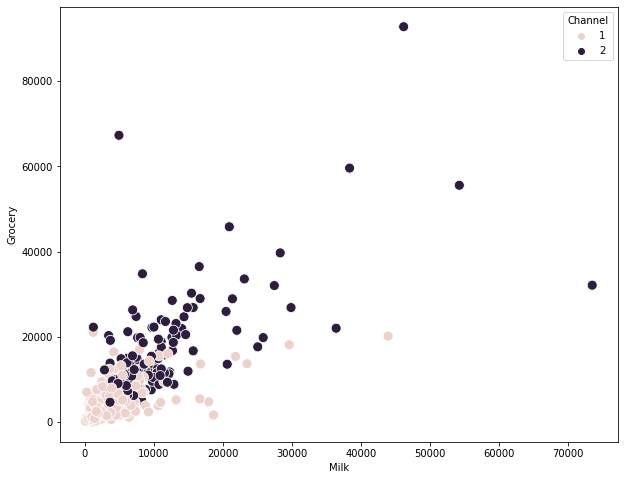

In [30]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="Milk", y="Grocery", hue="Channel", s=100);

<AxesSubplot:xlabel='Milk', ylabel='Count'>

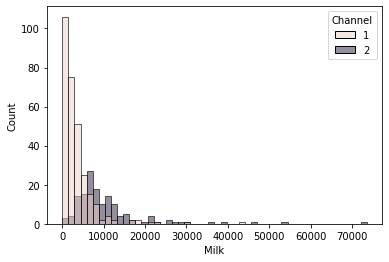

In [31]:
sns.histplot(data=df, x="Milk", hue="Channel")

Correlation Between Spending Categories


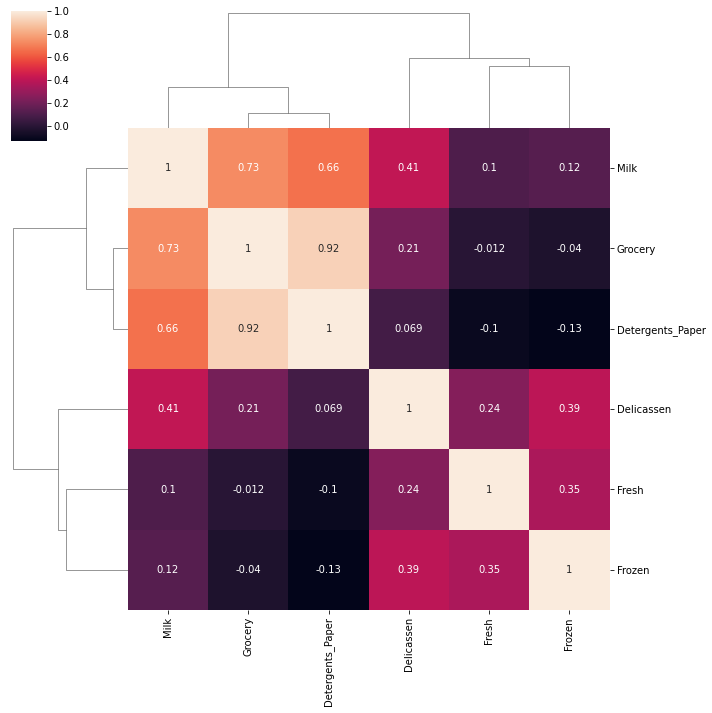

In [32]:
# Bieu dien su tuong quan giua cac bien
print("Correlation Between Spending Categories")
sns.clustermap(data=df.drop(["Region", "Channel"], axis=1).corr(), annot=True, row_cluster=True);

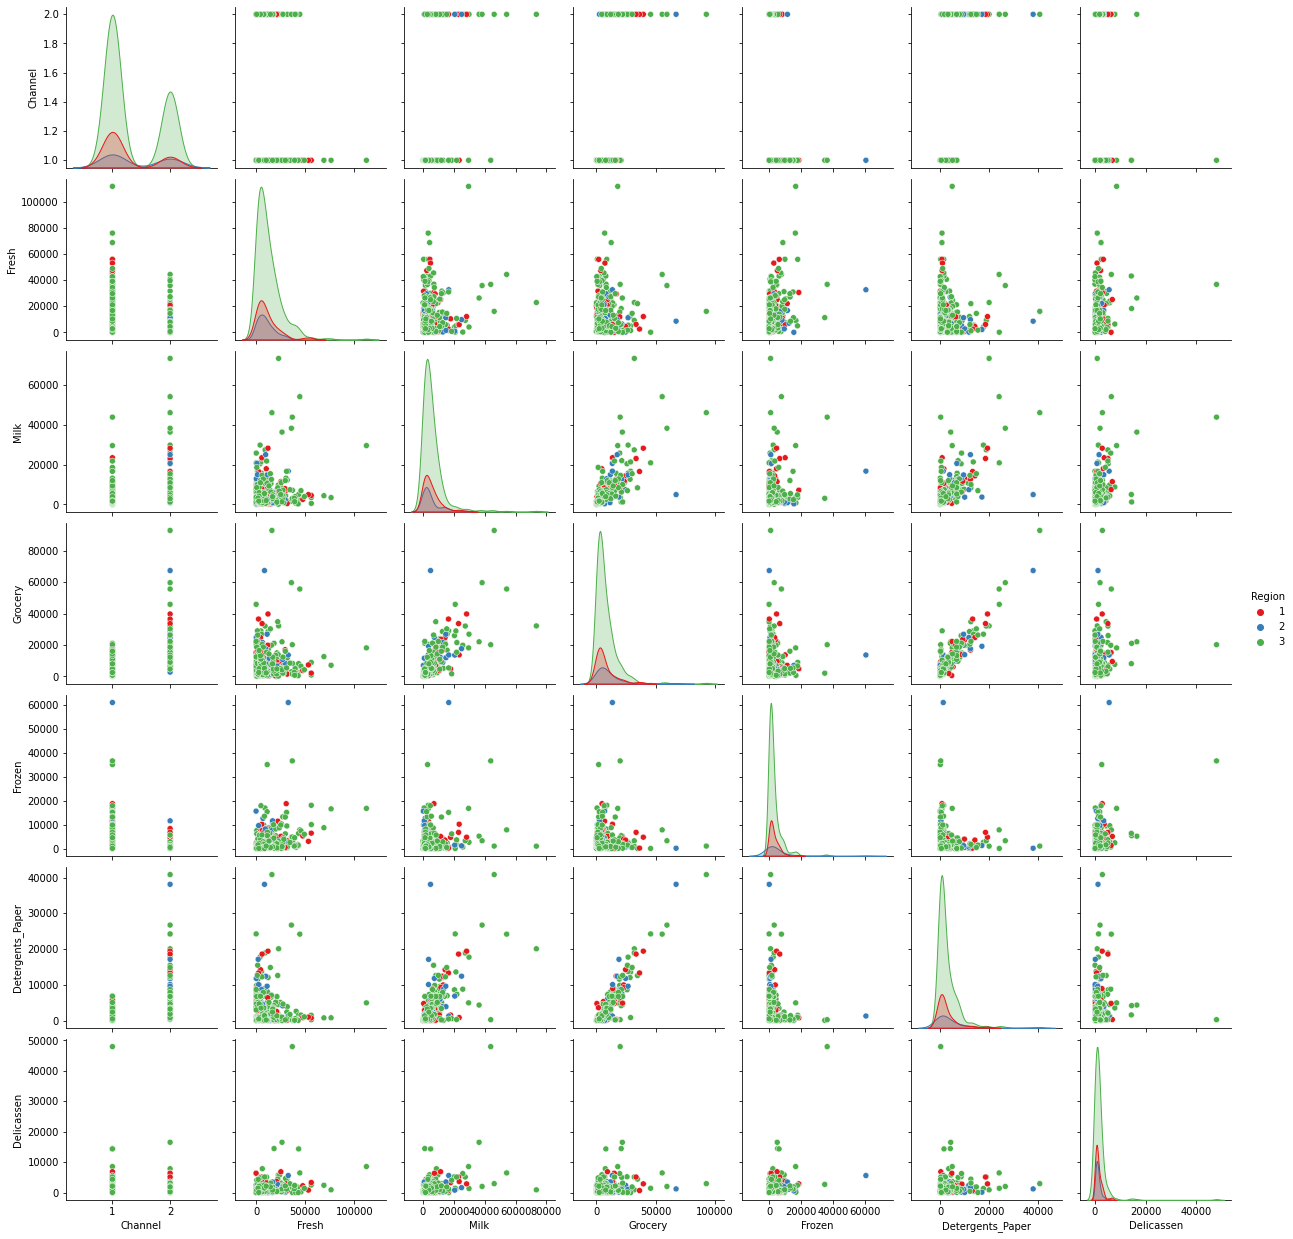

In [33]:
sns.pairplot(data=df, hue="Region", palette="Set1")

In [34]:
df["Region"].unique()

array([3, 1, 2])

In [35]:
df["Region"].value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [37]:
df["Channel"].value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_X = scaler.fit_transform(df)

In [39]:
scaler_X

array([[ 1.44865163,  0.59066829,  0.05293319, ..., -0.58936716,
        -0.04356873, -0.06633906],
       [ 1.44865163,  0.59066829, -0.39130197, ..., -0.27013618,
         0.08640684,  0.08915105],
       [ 1.44865163,  0.59066829, -0.44702926, ..., -0.13753572,
         0.13323164,  2.24329255],
       ...,
       [ 1.44865163,  0.59066829,  0.20032554, ..., -0.54337975,
         2.51121768,  0.12145607],
       [-0.69029709,  0.59066829, -0.13538389, ..., -0.41944059,
        -0.56977032,  0.21304614],
       [-0.69029709,  0.59066829, -0.72930698, ..., -0.62009417,
        -0.50488752, -0.52286938]])

In [55]:
from sklearn.cluster import DBSCAN

number_of_outliers = []
percentage_of_outliers = []

# min_sample starting point: 2 * no.of dimension
min_samples = 2 * scaler_X.shape[1]

for eps in np.linspace(0.001, 3, 50):
    # model creation
    dbscan = DBSCAN(eps=eps, min_samples=10)
    dbscan.fit(scaler_X)

    # number of clusters
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))

    # percentage of points classified as outliers
    per_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    percentage_of_outliers.append(per_outliers)

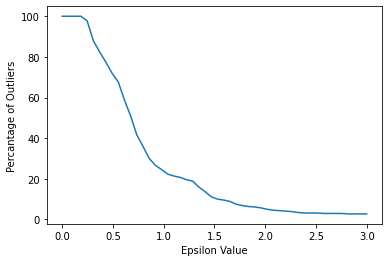

In [56]:
sns.lineplot(x=np.linspace(0.001, 3, 50), y=percentage_of_outliers)

plt.xlabel("Epsilon Value")
plt.ylabel("Percantage of Outliers")
plt.show()

In [67]:
# Chon duoc eps = 2
min_samples = 2 * scaler_X.shape[1]

dbscan = DBSCAN(eps=2, min_samples=min_samples)
dbscan.fit(scaler_X)

DBSCAN(eps=2, min_samples=16)

In [68]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 25, 129, 286]))

In [47]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1]), array([ 25, 129, 286]))

<AxesSubplot:xlabel='Grocery', ylabel='Milk'>

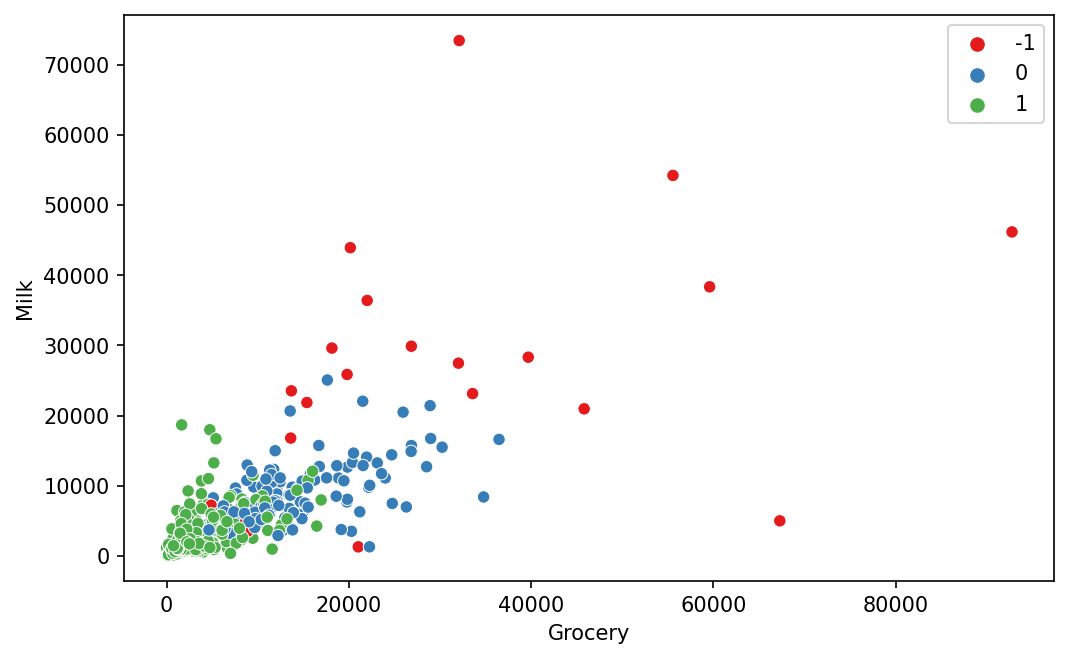

In [48]:
plt.figure(figsize=(8, 5), dpi=150)

sns.scatterplot(data=df, x="Grocery", y="Milk", hue=dbscan.labels_, palette="Set1")

<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

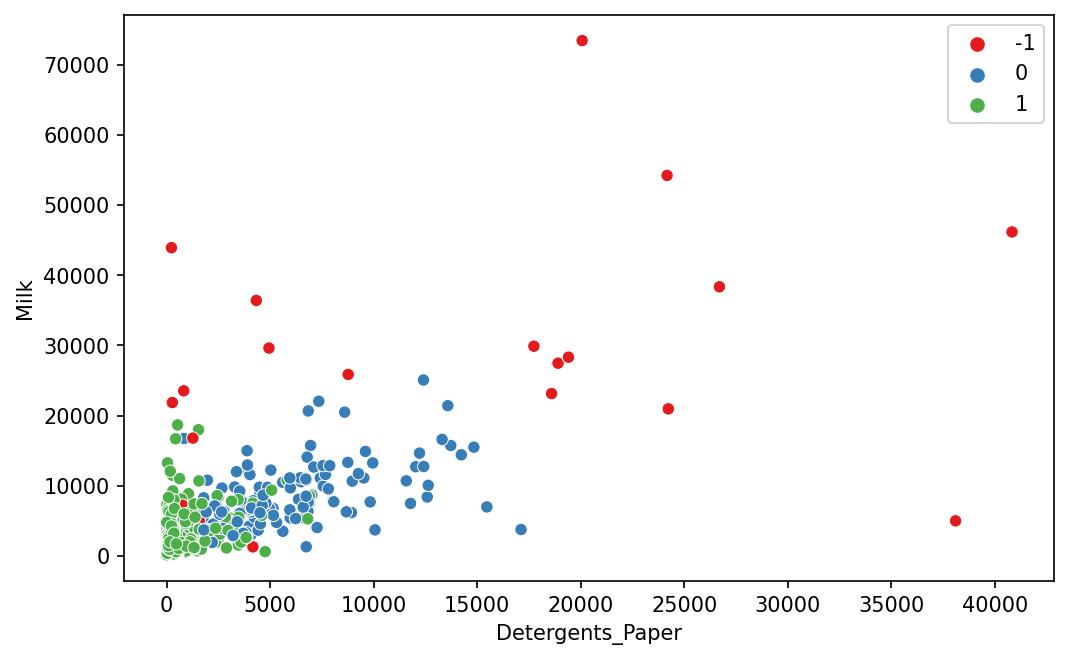

In [49]:
plt.figure(figsize=(8, 5), dpi=150)

sns.scatterplot(data=df, x="Detergents_Paper", y="Milk", hue=dbscan.labels_, palette="Set1")

In [50]:
df["Labels"] = dbscan.labels_

In [51]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Labels
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,0
2,2,3,6353,8808,7684,2405,3516,7844,0
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,1
436,1,3,39228,1431,764,4510,93,2346,1
437,2,3,14531,15488,30243,437,14841,1867,0
438,1,3,10290,1981,2232,1038,168,2125,1


In [52]:
cats_df = df.drop(["Channel", "Region"], axis=1)
cat_means = cats_df.groupby("Labels").mean()
cat_means

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Labels,,,,,,
-1,27729.920000,22966.960000,26609.600000,11289.640000,11173.560000,6707.160000
0,8227.666667,8615.852713,13859.674419,1447.759690,5969.581395,1498.457364
1,12326.972028,3023.559441,3655.328671,3086.181818,763.783217,1083.786713


<AxesSubplot:ylabel='Labels'>

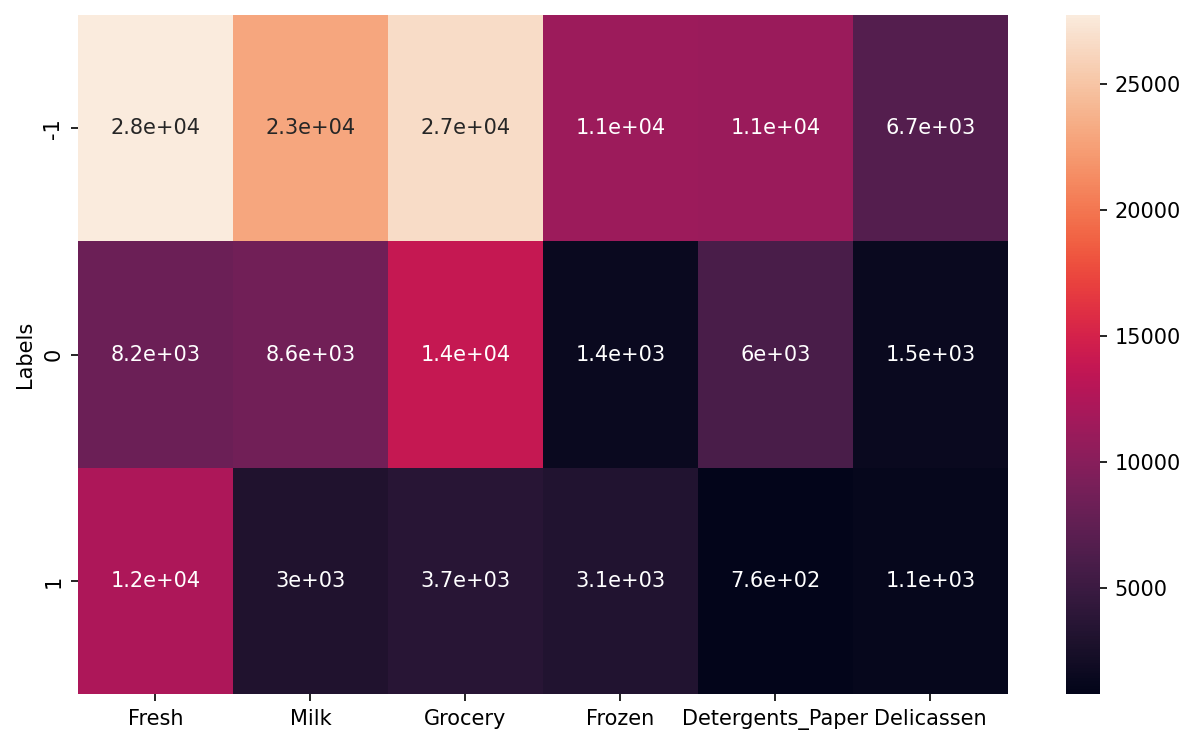

In [53]:
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(cat_means, annot=True)

<AxesSubplot:ylabel='Labels'>

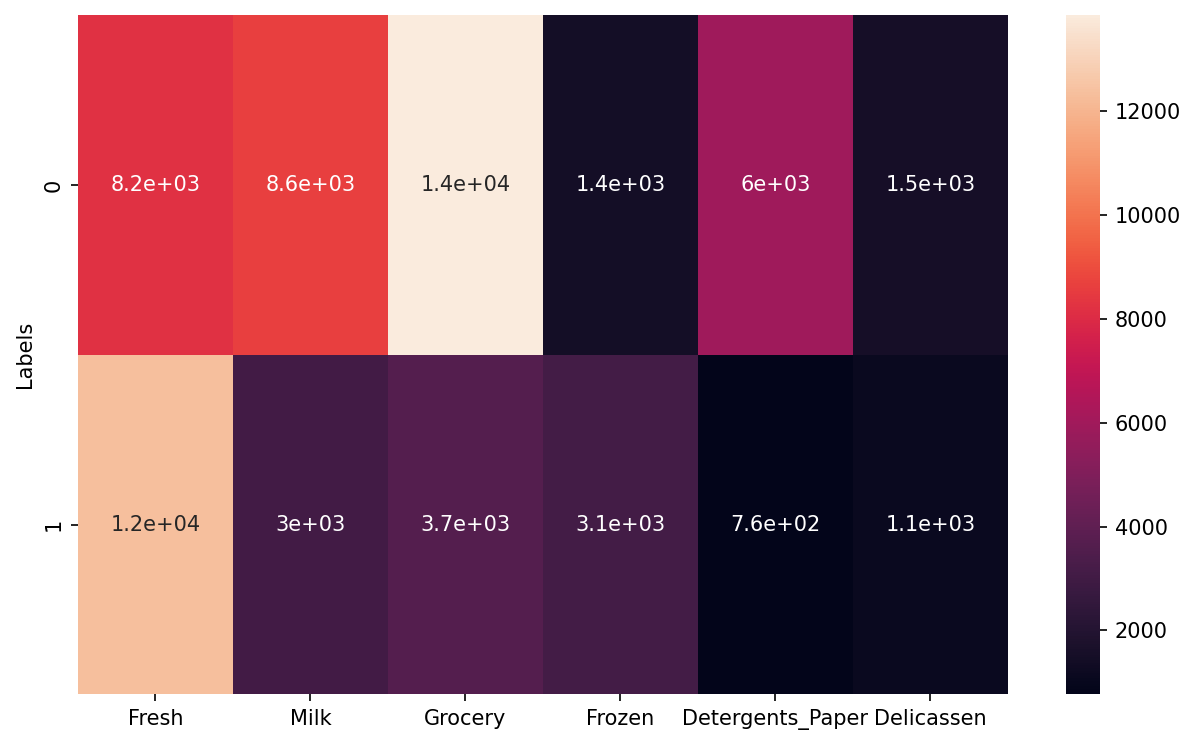

In [54]:
plt.figure(figsize=(10, 6), dpi=150)
sns.heatmap(cat_means.loc[[0, 1]], annot=True)